#### **Default for File Path**

In [4]:
import importlib.util
import os

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

In [6]:
import pandas as pd

file_path = os.path.join(config.BASE_DIR, 'dataset', 'preprocessed_data', 'INFY.csv')
df = pd.read_csv(file_path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-11,0.583984,0.781250,0.583984,0.732422,0.474227,172512000
1,1999-03-12,0.734375,0.761719,0.671875,0.728516,0.471698,39897600
2,1999-03-15,0.730469,0.730469,0.658203,0.662109,0.428701,12672000
3,1999-03-16,0.667969,0.691406,0.656250,0.656250,0.424908,9984000
4,1999-03-17,0.656250,0.699219,0.652344,0.660156,0.427437,15449600
...,...,...,...,...,...,...,...
6362,2024-06-24,17.990000,18.190001,17.959999,18.139999,18.139999,5758800
6363,2024-06-25,18.260000,18.360001,18.160000,18.340000,18.340000,8733100
6364,2024-06-26,18.290001,18.350000,18.160000,18.219999,18.219999,8693400
6365,2024-06-27,18.620001,18.700001,18.549999,18.629999,18.629999,8949300


In [7]:
df = df[['Date', 'Open', 'High', 'Low', 'Close']]
# to convert date from string to datetime
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\nilay\AppData\Local\Temp\ipykernel_12752\1917666807.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1999-03-11
1      1999-03-12
2      1999-03-15
3      1999-03-16
4      1999-03-17
          ...    
6362   2024-06-24
6363   2024-06-25
6364   2024-06-26
6365   2024-06-27
6366   2024-06-28
Name: Date, Length: 6367, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
# Assuming df is your DataFrame
df.dropna(axis=0, inplace=True)

C:\Users\nilay\AppData\Local\Temp\ipykernel_12752\21629864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


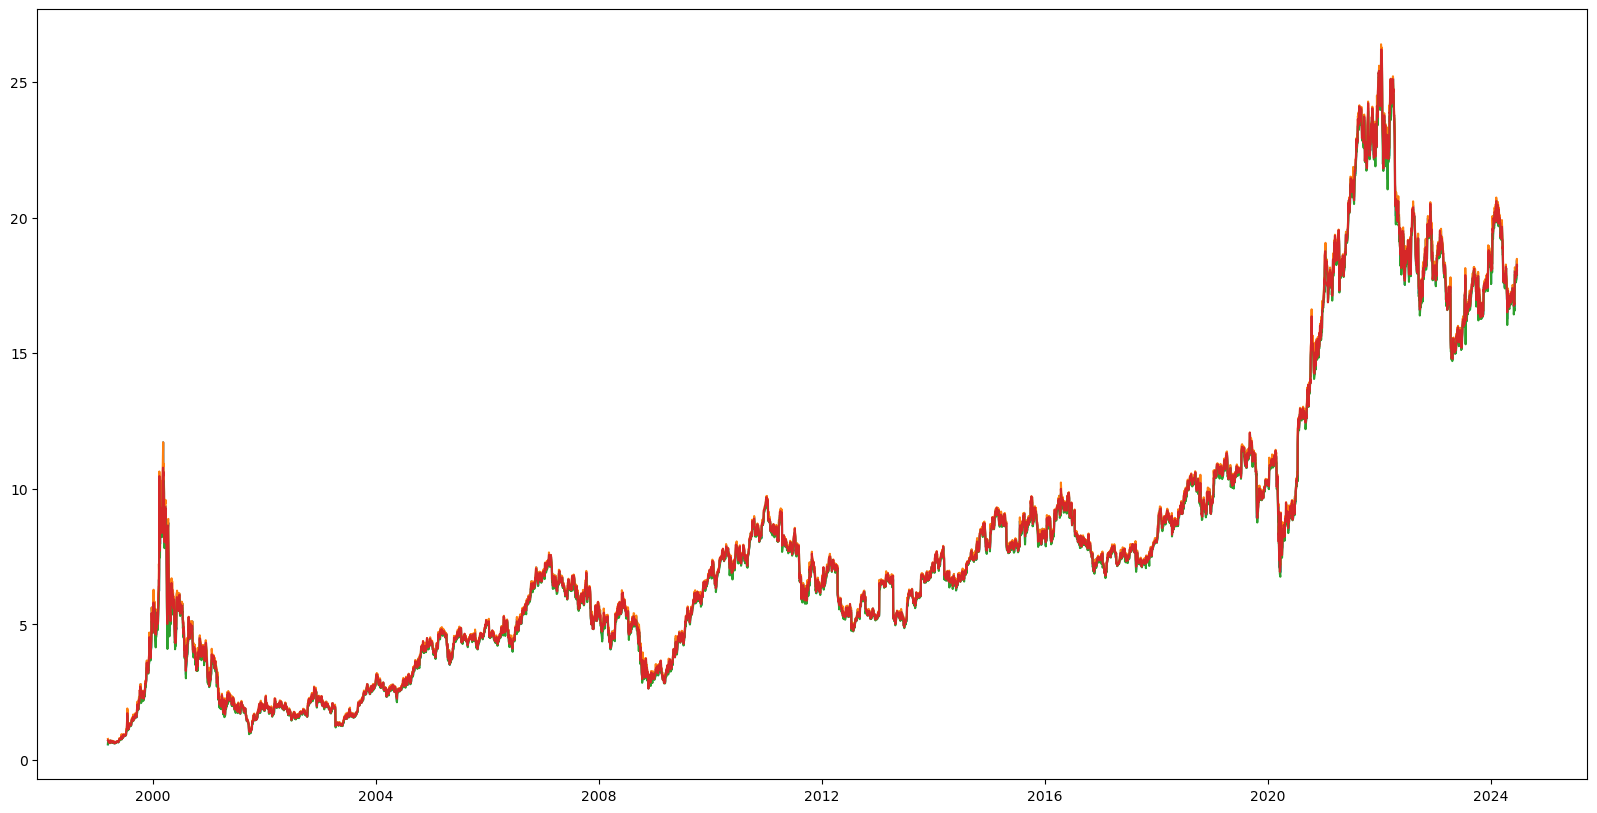

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Open'])
plt.plot(df.index, df['High'])
plt.plot(df.index, df['Low'])
plt.plot(df.index, df['Close'])

In [47]:
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2010-01-04', 
                                '2024-07-01', 
                                n=50)
windowed_df

Exception ignored in: <function _xla_gc_callback at 0x000001D33CDB65C0>
Traceback (most recent call last):
  File "c:\Users\nilay\anaconda3\Lib\site-packages\jax\_src\lib\__init__.py", line 99, in _xla_gc_callback
    xla_client._xla.collect_garbage()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [29]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((3646,), (3646, 50, 4), (3646, 4))

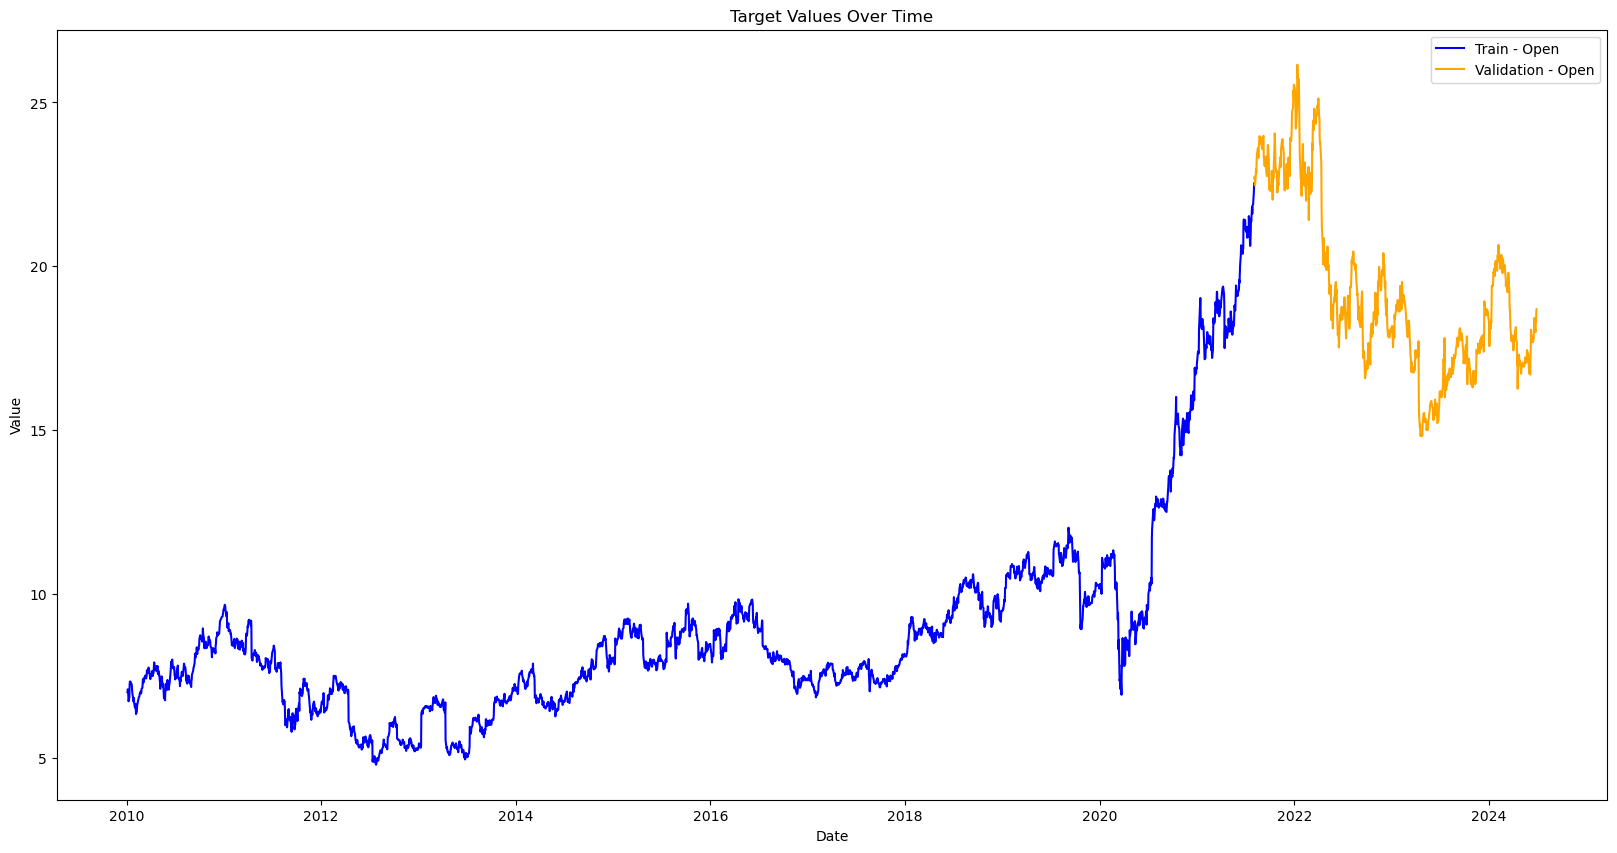

In [30]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:], X[q_80:], y[q_80:]
# dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(20, 10))

# Plotting target values for each feature set
plt.plot(dates_train, y_train[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val, y_val[:, 0], label='Validation - Open', color='orange')
# plt.plot(dates_test, y_test[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256, return_sequences=True),
    layers.Dropout(0.2),  # Dropout layer after the first LSTM layer
    layers.LSTM(128),
    layers.Dropout(0.2),  # Dropout layer after the second LSTM layer
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),  # Additional dense layer
    layers.Dense(4)
])

# Compile the model
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=100, 
          callbacks=[early_stopping])

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 217ms/step - loss: 73.7442 - mean_absolute_error: 7.9865 - val_loss: 250.7735 - val_mean_absolute_error: 15.4029
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - loss: 32.0705 - mean_absolute_error: 4.5857 - val_loss: 171.4523 - val_mean_absolute_error: 12.3970
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - loss: 22.1445 - mean_absolute_error: 3.7521 - val_loss: 124.9159 - val_mean_absolute_error: 10.3920
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - loss: 12.3747 - mean_absolute_error: 2.8661 - val_loss: 69.7789 - val_mean_absolute_error: 7.3195
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 38s 195ms/step - loss: 7.4921 - mean_absolute_error: 2.2405 - val_loss: 39.6280 - val_mean_absolute_error: 5.4621
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: 3.4578 - mean_absolute_error: 1.4123 - val_loss: 21.4619 - val_mean_absolute_error: 3.8244
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - loss: 1.2497 - m

#### **Iterative Stock Prediction for Future 30 days**

In [12]:
import pandas as pd
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Convert the start date string to a datetime object using str_to_datetime
start_date_str = '2024-06-21'
start_date = str_to_datetime(start_date_str)

# Create a range of business days for the next 30 weekdays
dates_set_future_prediction = pd.date_range(start=start_date, periods=30, freq=pd.offsets.BDay())

# Print the array of timestamps
print(dates_set_future_prediction.shape)
dates_set_future_prediction

(30,)


DatetimeIndex(['2024-06-21', '2024-06-24', '2024-06-25', '2024-06-26',
               '2024-06-27', '2024-06-28', '2024-07-01', '2024-07-02',
               '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-08',
               '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01'],
              dtype='datetime64[ns]', freq='B')

In [13]:
print(X_val.shape)
print(X_val[0:2])

(729, 50, 4)
[[[18.32 18.48 18.26 18.26]
  [18.19 18.45 18.18 18.44]
  [18.44 18.69 18.43 18.65]
  [18.8  18.83 18.7  18.72]
  [18.65 18.71 18.61 18.67]
  [18.85 18.94 18.71 18.73]
  [19.18 19.36 19.12 19.26]
  [19.41 19.48 19.37 19.37]
  [19.29 19.41 19.24 19.34]
  [19.17 19.33 19.11 19.27]
  [19.09 19.29 19.08 19.29]
  [19.18 19.26 19.09 19.14]
  [19.21 19.29 19.08 19.29]
  [19.29 19.48 19.22 19.4 ]
  [19.58 19.65 19.39 19.5 ]
  [19.5  19.7  19.5  19.66]
  [19.78 19.91 19.72 19.89]
  [19.99 20.55 19.92 20.54]
  [20.36 20.6  20.31 20.45]
  [20.64 20.64 20.21 20.23]
  [20.41 20.5  20.3  20.38]
  [20.47 20.74 20.42 20.67]
  [20.59 20.64 20.16 20.19]
  [20.38 20.54 20.31 20.53]
  [20.5  20.78 20.41 20.76]
  [20.55 20.71 20.52 20.69]
  [21.35 21.45 21.19 21.19]
  [21.43 21.51 21.13 21.25]
  [21.37 21.5  21.2  21.29]
  [21.31 21.5  21.22 21.45]
  [21.41 21.43 21.17 21.19]
  [21.18 21.24 20.84 20.96]
  [21.1  21.15 21.02 21.07]
  [21.03 21.11 20.98 21.11]
  [21.2  21.23 20.96 21.18]
  [20.8

In [14]:
# Initialize the input window with the last 50 days from X_val
input_window = X_val[-50:, :, :]  # Shape (50, 50, 4)
print(input_window.shape)
print(input_window)

# Initialize an empty list to store the predictions
test_set_future_prediction = []

(50, 50, 4)
[[[20.03 20.07 19.86 19.95]
  [20.04 20.15 19.85 19.86]
  [19.86 20.22 19.83 20.19]
  ...
  [17.74 17.96 17.73 17.86]
  [18.03 18.27 18.01 18.19]
  [18.   18.08 17.86 18.  ]]

 [[20.04 20.15 19.85 19.86]
  [19.86 20.22 19.83 20.19]
  [20.33 20.49 20.2  20.35]
  ...
  [18.03 18.27 18.01 18.19]
  [18.   18.08 17.86 18.  ]
  [18.14 18.14 17.85 17.94]]

 [[19.86 20.22 19.83 20.19]
  [20.33 20.49 20.2  20.35]
  [20.32 20.35 20.2  20.3 ]
  ...
  [18.   18.08 17.86 18.  ]
  [18.14 18.14 17.85 17.94]
  [17.78 17.86 17.53 17.72]]

 ...

 [[17.74 17.96 17.73 17.86]
  [18.03 18.27 18.01 18.19]
  [18.   18.08 17.86 18.  ]
  ...
  [17.85 17.9  17.74 17.81]
  [17.68 17.81 17.62 17.79]
  [17.77 17.99 17.73 17.94]]

 [[18.03 18.27 18.01 18.19]
  [18.   18.08 17.86 18.  ]
  [18.14 18.14 17.85 17.94]
  ...
  [17.68 17.81 17.62 17.79]
  [17.77 17.99 17.73 17.94]
  [17.98 18.07 17.88 17.91]]

 [[18.   18.08 17.86 18.  ]
  [18.14 18.14 17.85 17.94]
  [17.78 17.86 17.53 17.72]
  ...
  [17.77 17.

In [15]:
# Iterate over each date in the dates_set_future_prediction
for date in dates_set_future_prediction:
    # Ensure the input window has the shape (1, 50, 4) for the model
    current_input = input_window
    
    # Predict the next day's 'open', 'high', 'low', 'close'
    prediction = model.predict(current_input)
    
    # Store the prediction
    test_set_future_prediction.append(prediction[0])
    
    # Append the prediction to the input window and drop the oldest day
    input_window = np.append(input_window[1:], [prediction], axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/

In [16]:
print(len(test_set_future_prediction))
print(test_set_future_prediction)
print(test_set_future_prediction[0].shape)

30
[array([18.244558, 18.371933, 18.173841, 18.343424], dtype=float32), array([18.277117, 18.404432, 18.20733 , 18.37574 ], dtype=float32), array([18.17863 , 18.308908, 18.111475, 18.277931], dtype=float32), array([17.972593, 18.108   , 17.909319, 18.073507], dtype=float32), array([17.640558, 17.782736, 17.580748, 17.743532], dtype=float32), array([17.379759, 17.524958, 17.319483, 17.484049], dtype=float32), array([16.963768, 17.115454, 16.90506 , 17.070024], dtype=float32), array([16.850021, 16.998875, 16.786688, 16.956247], dtype=float32), array([17.048443, 17.189407, 16.979471, 17.153128], dtype=float32), array([17.259832, 17.396315, 17.190481, 17.365095], dtype=float32), array([17.330435, 17.46672 , 17.263792, 17.436708], dtype=float32), array([17.29455 , 17.432074, 17.230112, 17.401487], dtype=float32), array([17.252312, 17.39033 , 17.18841 , 17.35944 ], dtype=float32), array([17.220436, 17.358301, 17.155893, 17.327305], dtype=float32), array([17.119448, 17.259054, 17.055994, 17.2

In [32]:
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

In [37]:
dates_test[359:]

array([Timestamp('2024-06-21 00:00:00'), Timestamp('2024-06-24 00:00:00'),
       Timestamp('2024-06-25 00:00:00'), Timestamp('2024-06-26 00:00:00'),
       Timestamp('2024-06-27 00:00:00'), Timestamp('2024-06-28 00:00:00')],
      dtype=object)

In [36]:
X_test[359:]

array([[[18.  , 18.08, 17.86, 18.  ],
        [18.14, 18.14, 17.85, 17.94],
        [17.78, 17.86, 17.53, 17.72],
        ...,
        [17.77, 17.99, 17.73, 17.94],
        [17.98, 18.07, 17.88, 17.91],
        [18.42, 18.48, 18.16, 18.27]],

       [[18.14, 18.14, 17.85, 17.94],
        [17.78, 17.86, 17.53, 17.72],
        [17.69, 17.71, 17.26, 17.27],
        ...,
        [17.98, 18.07, 17.88, 17.91],
        [18.42, 18.48, 18.16, 18.27],
        [18.21, 18.24, 17.9 , 18.06]],

       [[17.78, 17.86, 17.53, 17.72],
        [17.69, 17.71, 17.26, 17.27],
        [16.98, 17.19, 16.98, 17.05],
        ...,
        [18.42, 18.48, 18.16, 18.27],
        [18.21, 18.24, 17.9 , 18.06],
        [17.99, 18.19, 17.96, 18.14]],

       [[17.69, 17.71, 17.26, 17.27],
        [16.98, 17.19, 16.98, 17.05],
        [17.14, 17.18, 16.87, 16.95],
        ...,
        [18.21, 18.24, 17.9 , 18.06],
        [17.99, 18.19, 17.96, 18.14],
        [18.26, 18.36, 18.16, 18.34]],

       [[16.98, 17.19, 16.98

In [38]:
y_test[359:]

array([[18.21, 18.24, 17.9 , 18.06],
       [17.99, 18.19, 17.96, 18.14],
       [18.26, 18.36, 18.16, 18.34],
       [18.29, 18.35, 18.16, 18.22],
       [18.62, 18.7 , 18.55, 18.63],
       [18.69, 18.74, 18.54, 18.62]], dtype=float32)

In [39]:
# Extract Open, High, Low, and Close prices
actual_open_prices = y_test[359:, 0]
actual_high_prices = y_test[359:, 1]
actual_low_prices = y_test[359:, 2]
actual_close_prices = y_test[359:, 3]

In [42]:
dates_test[359:].shape

(6,)

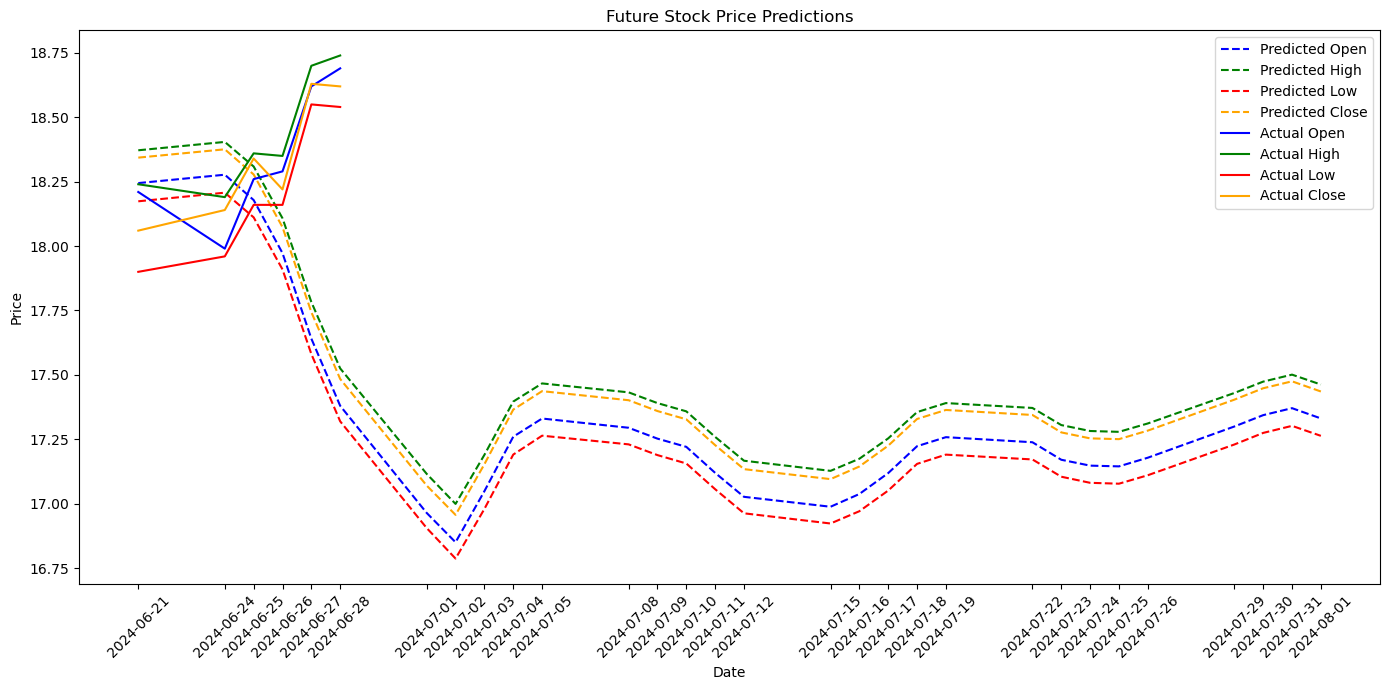

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming test_set_future_prediction and dates_set_future_prediction are already defined as in the provided details

# Convert test_set_future_prediction to a numpy array for easier manipulation
test_set_future_prediction = np.array(test_set_future_prediction)

# Extract Open, High, Low, and Close prices
open_prices = test_set_future_prediction[:, 0]
high_prices = test_set_future_prediction[:, 1]
low_prices = test_set_future_prediction[:, 2]
close_prices = test_set_future_prediction[:, 3]

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(dates_set_future_prediction, open_prices, label='Predicted Open', color='blue', linestyle='dashed')
plt.plot(dates_set_future_prediction, high_prices, label='Predicted High', color='green', linestyle='dashed')
plt.plot(dates_set_future_prediction, low_prices, label='Predicted Low', color='red', linestyle='dashed')
plt.plot(dates_set_future_prediction, close_prices, label='Predicted Close', color='orange', linestyle='dashed')

plt.plot(dates_test[359:], actual_open_prices, label='Actual Open', color='blue')
plt.plot(dates_test[359:], actual_high_prices, label='Actual High', color='green')
plt.plot(dates_test[359:], actual_low_prices, label='Actual Low', color='red')
plt.plot(dates_test[359:], actual_close_prices, label='Actual Close', color='orange')

# Adding title and labels
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Displaying all the dates on x-axis
plt.xticks(dates_set_future_prediction, rotation=45)
plt.tight_layout()

plt.show()

In [155]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Assuming test_set_future_prediction and dates_set_future_prediction are already defined as in the provided details

# Convert test_set_future_prediction to a numpy array for easier manipulation
test_set_future_prediction = np.array(test_set_future_prediction)

# Extract Open, High, Low, and Close prices
open_prices = test_set_future_prediction[:, 0]
high_prices = test_set_future_prediction[:, 1]
low_prices = test_set_future_prediction[:, 2]
close_prices = test_set_future_prediction[:, 3]

# Prepare data for tabulation
data = []
for i in range(len(dates_set_future_prediction)):
    data.append([
        dates_set_future_prediction[i],
        open_prices[i],
        high_prices[i],
        low_prices[i],
        close_prices[i]
    ])

# Define headers
headers = ["Date", "Predicted Open", "Predicted High", "Predicted Low", "Predicted Close"]

# Generate table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print(table)

+---------------------+------------------+------------------+-----------------+-------------------+
| Date                |   Predicted Open |   Predicted High |   Predicted Low |   Predicted Close |
+=====================+==================+==================+=================+===================+
| 2024-06-21 00:00:00 |          18.2446 |          18.3719 |         18.1738 |           18.3434 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2024-06-24 00:00:00 |          18.2771 |          18.4044 |         18.2073 |           18.3757 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2024-06-25 00:00:00 |          18.1786 |          18.3089 |         18.1115 |           18.2779 |
+---------------------+------------------+------------------+-----------------+-------------------+
| 2024-06-26 00:00:00 |          17.9726 |          18.108  |         17.9093 |           18.0735 |


#### **Checkpoint - Saving & Loading Model!**

In [115]:
import pickle
import h5py

def save_model(model_lstm_v2, pickle_filename, h5_filename):
    # Save as pickle
    with open(pickle_filename, 'wb') as f:
        pickle.dump(model_lstm_v2, f)
    
    # Save as HDF5
    model_lstm_v2.save(h5_filename)

pickle_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v3.pkl')
h5_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v3.h5')

# Save the model
save_model(model, pickle_file_path_lstm_v2, h5_file_path_lstm_v2)

In [5]:
import pickle
import os
pickle_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v3.pkl')
h5_file_path_lstm_v2 = os.path.join(config.BASE_DIR, 'models', 'model_lstm_v3.h5')

def load_model_from_pickle(pickle_file_path_lstm_v2):
    with open(pickle_file_path_lstm_v2, 'rb') as f:
        model = pickle.load(f)
    return model

# Load model from pickle file
model = load_model_from_pickle(pickle_file_path_lstm_v2)